# 1. Read the dataset to the python environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data = pd.read_excel('iris1.xls')
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
data.shape

(150, 5)

# 2. Do necessary pre-processing steps.


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              145 non-null    float64
 1   SW              145 non-null    float64
 2   PL              145 non-null    float64
 3   PW              145 non-null    float64
 4   Classification  145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


### Check for Null Values

In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

#### Null values present in SL,SW and PL columns 

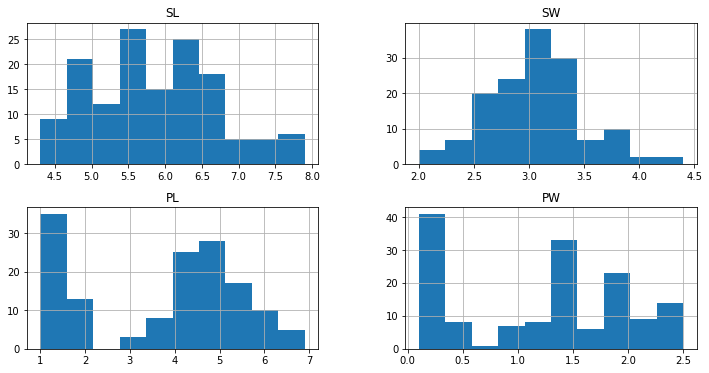

In [55]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(12,6))
plt.show()

In [56]:
data['SL'] = data['SL'].fillna(data['SL'].median())
data['SW'] = data['SW'].fillna(data['SW'].median())
data['PL'] = data['PL'].fillna(data['PL'].median())
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### Since the values in SL,SW, and PL are not a normal distribution, null values in those columns is filled with median values of their respective column

### Finding outliers in given data

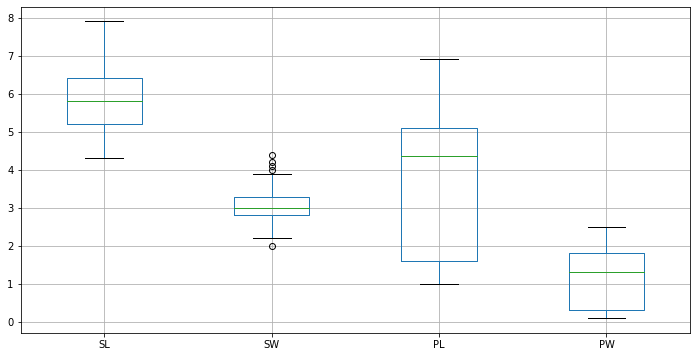

In [57]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.boxplot(figsize=(12,6))
plt.show()

#### Outliers are present in SW column

In [59]:
import numpy as np
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')
print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 2.8
Q2 = 3.0
Q3 = 3.25


In [60]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('IQR =',IQR)
print('lower limit =',low_lim)
print('upper limit =',up_lim)

IQR = 0.4500000000000002
lower limit = 2.1249999999999996
upper limit = 3.9250000000000003


In [61]:
outlier = []
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [62]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [63]:
ind = data['SW']>up_lim
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [36]:
ind = data['SW']<low_lim
data.loc[ind].index

Int64Index([60], dtype='int64')

In [64]:
data.drop([14, 15, 32, 33, 60], inplace=True)

#### Rows containing outliers are found and dropped from the data

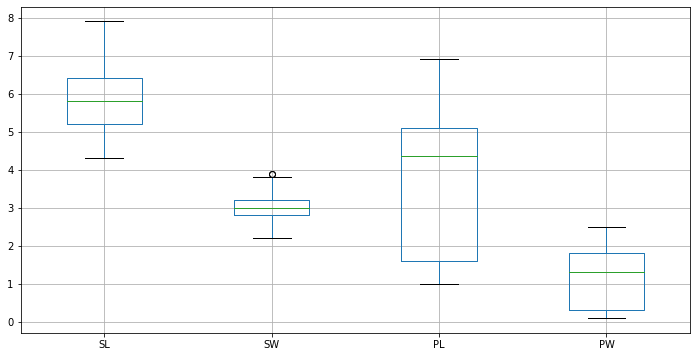

In [39]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.boxplot(figsize=(12,6))
plt.show()

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


In [65]:
data1=pd.get_dummies(data['Classification'])
data1

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [66]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [76]:
X=data.drop('PW',axis=1)
y=pd.DataFrame(data['PW'])

In [70]:
X=pd.concat([X,data1],axis=1)

In [77]:
X=pd.get_dummies(X)

In [78]:
X.head()

,SL,SW,PL,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,1,0,0
1,4.9,3.0,1.4,1,0,0
2,5.8,3.2,1.3,1,0,0
3,4.6,3.1,1.5,1,0,0
4,5.0,3.6,1.4,1,0,0
